<a href="https://colab.research.google.com/github/shoe-bham-cries/AI-project/blob/main/AIProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as n
import matplotlib.pyplot as plt
import numpy as np
import pandas as p
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout    

In [ ]:
data = p.read_csv('/content/drive/MyDrive/BTC-USD.csv', date_parser=True)
data['Open'].fillna(value=data['Open'].mean(), inplace=True)
data['High'].fillna(value=data['High'].mean(), inplace=True)
data['Low'].fillna(value=data['Low'].mean(), inplace=True)
data['Close'].fillna(value=data['Close'].mean(), inplace=True)
data['Adj Close'].fillna(value=data['Adj Close'].mean(), inplace=True)
data['Volume'].fillna(value=data['Volume'].mean(), inplace=True)

# Letting data up to be 31-Oct-2021 be the training set
training_data = data[data['Date'] <= '2021-10-31'].copy()
# Test data will be the data from 1-Nov-2021 to 21-Nov-2021
test_data = data[data['Date'] > '2021-10-31'].copy()
# Formatting the test and training tables by dropping irrelevant columns

training_data = training_data.drop(['Date', 'Adj Close'], axis=1)          
training_data.size

13010

In [ ]:
training_data.describe()

,Open,High,Low,Close,Volume
count,2602.000000,2602.000000,2602.000000,2602.000000,2.602000e+03
mean,9703.103068,9978.013851,9410.019681,9725.753514,1.386050e+10
std,14287.385660,14712.100555,13824.356396,14321.224797,1.989703e+10
min,176.897003,211.731003,171.509995,178.102997,5.914570e+06
25%,579.634018,585.867005,574.131012,580.463501,7.442338e+07
50%,5632.154785,5818.410157,5484.405762,5647.619873,4.654075e+09
75%,9788.392823,9985.623047,9582.369385,9795.882568,2.248523e+10
max,66002.234375,66930.390625,63610.675781,65992.835938,3.509679e+11


In [ ]:
scaler = MinMaxScaler()
train_data = scaler.fit_transform(training_data)
X_train = []
Y_train = []

for i in range(60, train_data.shape[0]):
    X_train.append(train_data[i - 60:i])
    Y_train.append(train_data[i, 0])

X_train = n.array(X_train)
Y_train = n.array(Y_train)

In [ ]:
# RNN intialization
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 5)))
model.add(Dropout(0.2))
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

Epoch 1/25
46/46 [==============================] - 17s 249ms/step - loss: 0.0040 - val_loss: 0.1568
Epoch 2/25
46/46 [==============================] - 11s 235ms/step - loss: 0.0014 - val_loss: 0.0276
Epoch 3/25
46/46 [==============================] - 11s 233ms/step - loss: 0.0011 - val_loss: 0.0168
Epoch 4/25
46/46 [==============================] - 11s 235ms/step - loss: 0.0010 - val_loss: 0.0128
Epoch 5/25
46/46 [==============================] - 11s 230ms/step - loss: 9.4719e-04 - val_loss: 0.0089
Epoch 6/25
46/46 [==============================] - 11s 233ms/step - loss: 7.9083e-04 - val_loss: 0.0071
Epoch 7/25
46/46 [==============================] - 11s 232ms/step - loss: 9.7369e-04 - val_loss: 0.0068
Epoch 8/25
46/46 [==============================] - 11s 233ms/step - loss: 0.0015 - val_loss: 0.0155
Epoch 9/25
46/46 [==============================] - 11s 233ms/step - loss: 8.3180e-04 - val_loss: 0.0183
Epoch 10/25
46/46 [==============================] - 11s 235ms/step - loss:

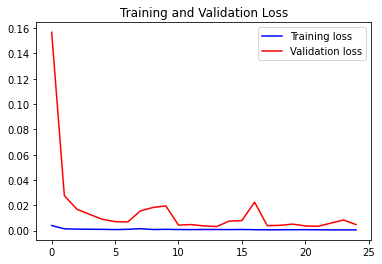

In [ ]:
history = model.fit(X_train, Y_train, epochs=25, batch_size=50, validation_split=0.1)

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
part_60_days = training_data.tail(60)
df = part_60_days.append(test_data, ignore_index=True)
df = df.drop(['Date', 'Adj Close'], axis=1)
df.head()
inputs = scaler.transform(df)

In [ ]:
X_test = []
Y_test = []
for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    Y_test.append(inputs[i, 0])

X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [ ]:
# regressor = LinearRegression()
Y_pred = model.predict(X_test)

scale = 1/scaler.scale_[0]
Y_test = Y_test*scale
Y_pred = Y_pred*scale

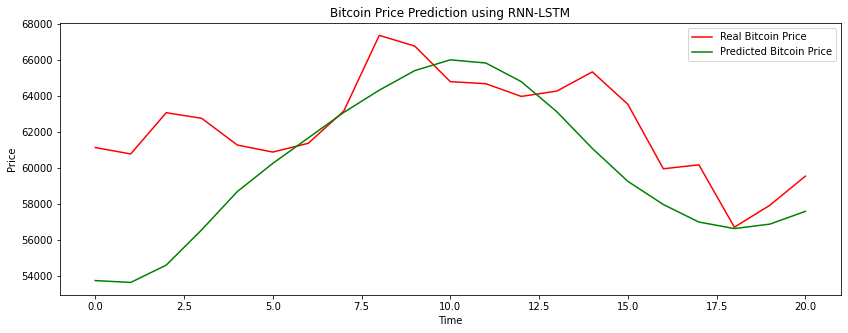

In [ ]:
plt.figure(figsize=(14, 5))
plt.plot(Y_test, color='red', label='Real Bitcoin Price')
plt.plot(Y_pred, color='green', label='Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()